<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9694535	total: 81.3ms	remaining: 1m 21s
1:	learn: 0.9371150	total: 81.8ms	remaining: 40.8s
2:	learn: 0.9095517	total: 84.2ms	remaining: 28s
3:	learn: 0.8787314	total: 84.9ms	remaining: 21.1s
4:	learn: 0.8536744	total: 85.3ms	remaining: 17s
5:	learn: 0.8256260	total: 88.9ms	remaining: 14.7s
6:	learn: 0.8029055	total: 89.1ms	remaining: 12.6s
7:	learn: 0.7797524	total: 89.6ms	remaining: 11.1s
8:	learn: 0.7541991	total: 89.9ms	remaining: 9.9s
9:	learn: 0.7315010	total: 90.2ms	remaining: 8.93s
10:	learn: 0.7085233	total: 90.5ms	remaining: 8.13s
11:	learn: 0.6856101	total: 90.7ms	remaining: 7.47s
12:	learn: 0.6670719	total: 90.9ms	remaining: 6.9s
13:	learn: 0.6481108	total: 91.2ms	remaining: 6.42s
14:	learn: 0.6278192	total: 91.4ms	remaining: 6s
15:	learn: 0.6094367	total: 91.7ms	remaining: 5.64s
16:	learn: 0.5903573	total: 91.9ms	remaining: 5.32s
17:	learn: 0.5722177	total: 92.2ms	remaining: 5.03s
18:	learn: 0.5561757	total: 92.4ms	remaining: 4.77s


28:	learn: 0.4149342	total: 112ms	remaining: 3.75s
29:	learn: 0.4026775	total: 112ms	remaining: 3.63s
30:	learn: 0.3912478	total: 113ms	remaining: 3.54s
31:	learn: 0.3805967	total: 114ms	remaining: 3.44s
32:	learn: 0.3714436	total: 120ms	remaining: 3.52s
33:	learn: 0.3610343	total: 120ms	remaining: 3.42s
34:	learn: 0.3508905	total: 125ms	remaining: 3.45s
35:	learn: 0.3407481	total: 125ms	remaining: 3.36s
36:	learn: 0.3311267	total: 126ms	remaining: 3.27s
37:	learn: 0.3213769	total: 126ms	remaining: 3.19s
38:	learn: 0.3121474	total: 126ms	remaining: 3.11s
39:	learn: 0.3046213	total: 127ms	remaining: 3.04s
40:	learn: 0.2955283	total: 127ms	remaining: 2.97s
41:	learn: 0.2887698	total: 127ms	remaining: 2.91s
42:	learn: 0.2818063	total: 128ms	remaining: 2.84s
43:	learn: 0.2744464	total: 128ms	remaining: 2.78s
44:	learn: 0.2669841	total: 128ms	remaining: 2.72s
45:	learn: 0.2602525	total: 129ms	remaining: 2.67s
46:	learn: 0.2531086	total: 132ms	remaining: 2.67s
47:	learn: 0.2471811	total: 133

145:	learn: 0.0516624	total: 222ms	remaining: 1.3s
146:	learn: 0.0514292	total: 222ms	remaining: 1.29s
147:	learn: 0.0511199	total: 223ms	remaining: 1.28s
148:	learn: 0.0508871	total: 223ms	remaining: 1.27s
149:	learn: 0.0505776	total: 223ms	remaining: 1.26s
150:	learn: 0.0503218	total: 224ms	remaining: 1.26s
151:	learn: 0.0499411	total: 224ms	remaining: 1.25s
152:	learn: 0.0496379	total: 224ms	remaining: 1.24s
153:	learn: 0.0493722	total: 224ms	remaining: 1.23s
154:	learn: 0.0491833	total: 225ms	remaining: 1.22s
155:	learn: 0.0489459	total: 225ms	remaining: 1.22s
156:	learn: 0.0486761	total: 225ms	remaining: 1.21s
157:	learn: 0.0484976	total: 225ms	remaining: 1.2s
158:	learn: 0.0482744	total: 226ms	remaining: 1.19s
159:	learn: 0.0480626	total: 226ms	remaining: 1.19s
160:	learn: 0.0478949	total: 226ms	remaining: 1.18s
161:	learn: 0.0476853	total: 227ms	remaining: 1.17s
162:	learn: 0.0474444	total: 227ms	remaining: 1.16s
163:	learn: 0.0472863	total: 227ms	remaining: 1.16s
164:	learn: 0.

209:	learn: 0.0402518	total: 308ms	remaining: 1.16s
210:	learn: 0.0401608	total: 309ms	remaining: 1.15s
211:	learn: 0.0400424	total: 311ms	remaining: 1.16s
212:	learn: 0.0399708	total: 311ms	remaining: 1.15s
213:	learn: 0.0398968	total: 312ms	remaining: 1.15s
214:	learn: 0.0397529	total: 316ms	remaining: 1.15s
215:	learn: 0.0396393	total: 316ms	remaining: 1.15s
216:	learn: 0.0395264	total: 318ms	remaining: 1.15s
217:	learn: 0.0393888	total: 321ms	remaining: 1.15s
218:	learn: 0.0393331	total: 322ms	remaining: 1.15s
219:	learn: 0.0391505	total: 322ms	remaining: 1.14s
220:	learn: 0.0390821	total: 322ms	remaining: 1.14s
221:	learn: 0.0389632	total: 322ms	remaining: 1.13s
222:	learn: 0.0387889	total: 323ms	remaining: 1.12s
223:	learn: 0.0386961	total: 323ms	remaining: 1.12s
224:	learn: 0.0385906	total: 328ms	remaining: 1.13s
225:	learn: 0.0385127	total: 329ms	remaining: 1.13s
226:	learn: 0.0383703	total: 329ms	remaining: 1.12s
227:	learn: 0.0383066	total: 329ms	remaining: 1.11s
228:	learn: 

284:	learn: 0.0321156	total: 441ms	remaining: 1.11s
285:	learn: 0.0320843	total: 442ms	remaining: 1.1s
286:	learn: 0.0320130	total: 445ms	remaining: 1.11s
287:	learn: 0.0319270	total: 446ms	remaining: 1.1s
288:	learn: 0.0318638	total: 446ms	remaining: 1.1s
289:	learn: 0.0317993	total: 446ms	remaining: 1.09s
290:	learn: 0.0317387	total: 447ms	remaining: 1.09s
291:	learn: 0.0316754	total: 447ms	remaining: 1.08s
292:	learn: 0.0316287	total: 453ms	remaining: 1.09s
293:	learn: 0.0315816	total: 457ms	remaining: 1.1s
294:	learn: 0.0315216	total: 459ms	remaining: 1.09s
295:	learn: 0.0314193	total: 460ms	remaining: 1.09s
296:	learn: 0.0313282	total: 460ms	remaining: 1.09s
297:	learn: 0.0312397	total: 460ms	remaining: 1.08s
298:	learn: 0.0311429	total: 470ms	remaining: 1.1s
299:	learn: 0.0310857	total: 472ms	remaining: 1.1s
300:	learn: 0.0310318	total: 476ms	remaining: 1.1s
301:	learn: 0.0309457	total: 476ms	remaining: 1.1s
302:	learn: 0.0308619	total: 476ms	remaining: 1.09s
303:	learn: 0.030787

376:	learn: 0.0266727	total: 554ms	remaining: 915ms
377:	learn: 0.0266233	total: 554ms	remaining: 912ms
378:	learn: 0.0265612	total: 555ms	remaining: 909ms
379:	learn: 0.0265083	total: 557ms	remaining: 908ms
380:	learn: 0.0264365	total: 562ms	remaining: 914ms
381:	learn: 0.0263473	total: 564ms	remaining: 912ms
382:	learn: 0.0262942	total: 565ms	remaining: 910ms
383:	learn: 0.0262383	total: 566ms	remaining: 909ms
384:	learn: 0.0262031	total: 567ms	remaining: 906ms
385:	learn: 0.0261183	total: 567ms	remaining: 902ms
386:	learn: 0.0260910	total: 568ms	remaining: 899ms
387:	learn: 0.0260419	total: 570ms	remaining: 899ms
388:	learn: 0.0259610	total: 577ms	remaining: 907ms
389:	learn: 0.0259172	total: 588ms	remaining: 920ms
390:	learn: 0.0258819	total: 589ms	remaining: 917ms
391:	learn: 0.0258514	total: 590ms	remaining: 915ms
392:	learn: 0.0258071	total: 592ms	remaining: 914ms
393:	learn: 0.0257737	total: 592ms	remaining: 911ms
394:	learn: 0.0257425	total: 592ms	remaining: 907ms
395:	learn: 

475:	learn: 0.0228580	total: 673ms	remaining: 741ms
476:	learn: 0.0228417	total: 675ms	remaining: 740ms
477:	learn: 0.0228095	total: 676ms	remaining: 738ms
478:	learn: 0.0227914	total: 676ms	remaining: 735ms
479:	learn: 0.0227674	total: 676ms	remaining: 733ms
480:	learn: 0.0227435	total: 676ms	remaining: 730ms
481:	learn: 0.0227044	total: 677ms	remaining: 727ms
482:	learn: 0.0226664	total: 677ms	remaining: 725ms
483:	learn: 0.0226455	total: 677ms	remaining: 722ms
484:	learn: 0.0226189	total: 678ms	remaining: 719ms
485:	learn: 0.0225557	total: 678ms	remaining: 717ms
486:	learn: 0.0225133	total: 678ms	remaining: 714ms
487:	learn: 0.0224969	total: 678ms	remaining: 712ms
488:	learn: 0.0224607	total: 679ms	remaining: 709ms
489:	learn: 0.0224382	total: 679ms	remaining: 707ms
490:	learn: 0.0224131	total: 679ms	remaining: 704ms
491:	learn: 0.0223821	total: 679ms	remaining: 702ms
492:	learn: 0.0223409	total: 680ms	remaining: 699ms
493:	learn: 0.0223159	total: 680ms	remaining: 696ms
494:	learn: 

614:	learn: 0.0193762	total: 812ms	remaining: 508ms
615:	learn: 0.0193577	total: 813ms	remaining: 507ms
616:	learn: 0.0193371	total: 813ms	remaining: 505ms
617:	learn: 0.0193196	total: 814ms	remaining: 503ms
618:	learn: 0.0193027	total: 814ms	remaining: 501ms
619:	learn: 0.0192799	total: 814ms	remaining: 499ms
620:	learn: 0.0192715	total: 815ms	remaining: 497ms
621:	learn: 0.0192538	total: 815ms	remaining: 495ms
622:	learn: 0.0192124	total: 815ms	remaining: 493ms
623:	learn: 0.0191960	total: 816ms	remaining: 492ms
624:	learn: 0.0191576	total: 817ms	remaining: 490ms
625:	learn: 0.0191438	total: 818ms	remaining: 489ms
626:	learn: 0.0191256	total: 820ms	remaining: 488ms
627:	learn: 0.0191080	total: 820ms	remaining: 486ms
628:	learn: 0.0190990	total: 821ms	remaining: 484ms
629:	learn: 0.0190859	total: 821ms	remaining: 482ms
630:	learn: 0.0190504	total: 822ms	remaining: 480ms
631:	learn: 0.0190332	total: 822ms	remaining: 479ms
632:	learn: 0.0190186	total: 822ms	remaining: 477ms
633:	learn: 

693:	learn: 0.0178672	total: 932ms	remaining: 411ms
694:	learn: 0.0178340	total: 935ms	remaining: 410ms
695:	learn: 0.0178178	total: 935ms	remaining: 408ms
696:	learn: 0.0177638	total: 935ms	remaining: 407ms
697:	learn: 0.0177126	total: 938ms	remaining: 406ms
698:	learn: 0.0176984	total: 939ms	remaining: 404ms
699:	learn: 0.0176924	total: 940ms	remaining: 403ms
700:	learn: 0.0176812	total: 941ms	remaining: 401ms
701:	learn: 0.0176759	total: 943ms	remaining: 400ms
702:	learn: 0.0176610	total: 944ms	remaining: 399ms
703:	learn: 0.0176433	total: 945ms	remaining: 397ms
704:	learn: 0.0176260	total: 946ms	remaining: 396ms
705:	learn: 0.0176153	total: 947ms	remaining: 394ms
706:	learn: 0.0175958	total: 949ms	remaining: 393ms
707:	learn: 0.0175813	total: 950ms	remaining: 392ms
708:	learn: 0.0175693	total: 951ms	remaining: 390ms
709:	learn: 0.0175541	total: 952ms	remaining: 389ms
710:	learn: 0.0175399	total: 953ms	remaining: 388ms
711:	learn: 0.0175207	total: 954ms	remaining: 386ms
712:	learn: 

773:	learn: 0.0165409	total: 1.03s	remaining: 300ms
774:	learn: 0.0165179	total: 1.03s	remaining: 299ms
775:	learn: 0.0164804	total: 1.03s	remaining: 298ms
776:	learn: 0.0164655	total: 1.03s	remaining: 296ms
777:	learn: 0.0164518	total: 1.03s	remaining: 295ms
778:	learn: 0.0164400	total: 1.03s	remaining: 293ms
779:	learn: 0.0164307	total: 1.03s	remaining: 292ms
780:	learn: 0.0164175	total: 1.03s	remaining: 290ms
781:	learn: 0.0164138	total: 1.03s	remaining: 289ms
782:	learn: 0.0163997	total: 1.04s	remaining: 287ms
783:	learn: 0.0163839	total: 1.04s	remaining: 286ms
784:	learn: 0.0163596	total: 1.04s	remaining: 284ms
785:	learn: 0.0163443	total: 1.04s	remaining: 283ms
786:	learn: 0.0163316	total: 1.04s	remaining: 281ms
787:	learn: 0.0163096	total: 1.04s	remaining: 280ms
788:	learn: 0.0162849	total: 1.04s	remaining: 278ms
789:	learn: 0.0162714	total: 1.04s	remaining: 277ms
790:	learn: 0.0162638	total: 1.04s	remaining: 275ms
791:	learn: 0.0162528	total: 1.04s	remaining: 274ms
792:	learn: 

849:	learn: 0.0155070	total: 1.09s	remaining: 192ms
850:	learn: 0.0154967	total: 1.09s	remaining: 191ms
851:	learn: 0.0154791	total: 1.09s	remaining: 190ms
852:	learn: 0.0154711	total: 1.09s	remaining: 188ms
853:	learn: 0.0154557	total: 1.09s	remaining: 187ms
854:	learn: 0.0154481	total: 1.09s	remaining: 186ms
855:	learn: 0.0154397	total: 1.09s	remaining: 184ms
856:	learn: 0.0154323	total: 1.09s	remaining: 183ms
857:	learn: 0.0154167	total: 1.1s	remaining: 182ms
858:	learn: 0.0154063	total: 1.1s	remaining: 180ms
859:	learn: 0.0153862	total: 1.1s	remaining: 179ms
860:	learn: 0.0153759	total: 1.1s	remaining: 177ms
861:	learn: 0.0153652	total: 1.1s	remaining: 176ms
862:	learn: 0.0153571	total: 1.1s	remaining: 175ms
863:	learn: 0.0153438	total: 1.1s	remaining: 173ms
864:	learn: 0.0153374	total: 1.1s	remaining: 172ms
865:	learn: 0.0153206	total: 1.1s	remaining: 170ms
866:	learn: 0.0153099	total: 1.1s	remaining: 169ms
867:	learn: 0.0152995	total: 1.1s	remaining: 168ms
868:	learn: 0.0152825	t

889:	learn: 0.0150702	total: 1.12s	remaining: 139ms
890:	learn: 0.0150498	total: 1.13s	remaining: 138ms
891:	learn: 0.0150405	total: 1.13s	remaining: 137ms
892:	learn: 0.0150301	total: 1.13s	remaining: 135ms
893:	learn: 0.0150201	total: 1.13s	remaining: 134ms
894:	learn: 0.0150065	total: 1.13s	remaining: 133ms
895:	learn: 0.0149997	total: 1.13s	remaining: 131ms
896:	learn: 0.0149868	total: 1.13s	remaining: 130ms
897:	learn: 0.0149790	total: 1.13s	remaining: 129ms
898:	learn: 0.0149637	total: 1.14s	remaining: 128ms
899:	learn: 0.0149553	total: 1.14s	remaining: 126ms
900:	learn: 0.0149441	total: 1.14s	remaining: 125ms
901:	learn: 0.0149361	total: 1.14s	remaining: 124ms
902:	learn: 0.0149200	total: 1.14s	remaining: 122ms
903:	learn: 0.0149108	total: 1.14s	remaining: 121ms
904:	learn: 0.0149015	total: 1.14s	remaining: 120ms
905:	learn: 0.0148946	total: 1.14s	remaining: 118ms
906:	learn: 0.0148851	total: 1.14s	remaining: 117ms
907:	learn: 0.0148698	total: 1.14s	remaining: 116ms
908:	learn: 

978:	learn: 0.0141254	total: 1.22s	remaining: 26.2ms
979:	learn: 0.0141127	total: 1.22s	remaining: 25ms
980:	learn: 0.0140997	total: 1.22s	remaining: 23.7ms
981:	learn: 0.0140874	total: 1.22s	remaining: 22.4ms
982:	learn: 0.0140819	total: 1.22s	remaining: 21.2ms
983:	learn: 0.0140663	total: 1.22s	remaining: 19.9ms
984:	learn: 0.0140606	total: 1.23s	remaining: 18.7ms
985:	learn: 0.0140552	total: 1.23s	remaining: 17.4ms
986:	learn: 0.0140403	total: 1.23s	remaining: 16.2ms
987:	learn: 0.0140317	total: 1.23s	remaining: 14.9ms
988:	learn: 0.0140241	total: 1.23s	remaining: 13.7ms
989:	learn: 0.0140180	total: 1.23s	remaining: 12.4ms
990:	learn: 0.0139887	total: 1.23s	remaining: 11.2ms
991:	learn: 0.0139812	total: 1.23s	remaining: 9.91ms
992:	learn: 0.0139717	total: 1.23s	remaining: 8.66ms
993:	learn: 0.0139630	total: 1.23s	remaining: 7.42ms
994:	learn: 0.0139571	total: 1.23s	remaining: 6.18ms
995:	learn: 0.0139409	total: 1.23s	remaining: 4.94ms
996:	learn: 0.0139303	total: 1.23s	remaining: 3.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.020206188845231197
ABC Pre-generator MAE 0.022889236150586093


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

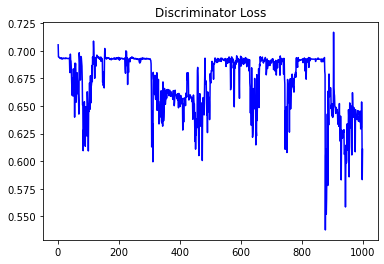

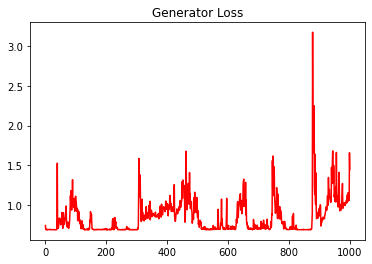

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.0913542382631983


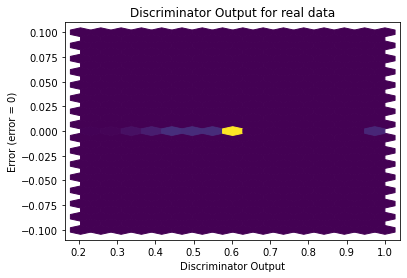

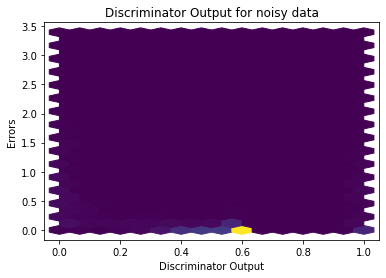

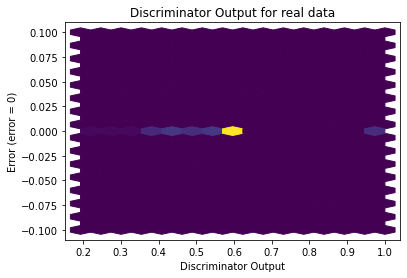

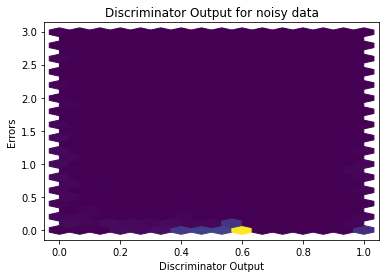

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())